In [75]:
import pandas as pd  
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('Price_History_ASX200.csv')

In [76]:
data.head()

,Date,Close Price,Open,High,Low,Vol.,Change %
0,21-Feb-07,5951.8,"5,981.50","5,991.80","5,951.00",623.69M,-0.63%
1,22-Feb-07,6017.1,"5,953.40","6,017.10","5,952.60",819.21M,1.10%
2,23-Feb-07,6036.1,"6,019.60","6,052.10","6,019.10",968.64M,0.32%
3,26-Feb-07,6044.0,"6,036.50","6,044.00","6,008.00",730.23M,0.13%
4,27-Feb-07,5993.8,"6,043.30","6,043.30","5,993.80",663.76M,-0.83%


In [77]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [78]:
data.head()

,Close Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2007-02-21,5951.8,"5,981.50","5,991.80","5,951.00",623.69M,-0.63%
2007-02-22,6017.1,"5,953.40","6,017.10","5,952.60",819.21M,1.10%
2007-02-23,6036.1,"6,019.60","6,052.10","6,019.10",968.64M,0.32%
2007-02-26,6044.0,"6,036.50","6,044.00","6,008.00",730.23M,0.13%
2007-02-27,5993.8,"6,043.30","6,043.30","5,993.80",663.76M,-0.83%


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3612 entries, 2007-02-21 to 2021-03-19
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close Price  3612 non-null   float64
 1   Open         3612 non-null   object 
 2   High         3612 non-null   object 
 3   Low          3612 non-null   object 
 4   Vol.         3612 non-null   object 
 5   Change %     3612 non-null   object 
dtypes: float64(1), object(5)
memory usage: 197.5+ KB


In [80]:
data1 = data['2012-03-20':'2021-03-19']

In [81]:
data1

,Close Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2012-03-20,4275.0,"4,292.40","4,292.70","4,263.10",837.42M,-0.37%
2012-03-21,4254.3,"4,265.50","4,275.20","4,242.80",746.97M,-0.48%
2012-03-22,4273.7,"4,251.60","4,282.70","4,250.80",768.73M,0.46%
2012-03-23,4270.4,"4,262.30","4,277.80","4,238.40",809.95M,-0.08%
2012-03-26,4262.8,"4,269.70","4,289.80","4,262.80",643.86M,-0.18%
...,...,...,...,...,...,...
2021-03-15,6773.0,"6,766.80","6,793.50","6,727.50",480.30M,0.09%
2021-03-16,6827.1,"6,773.00","6,858.90","6,767.80",586.89M,0.80%
2021-03-17,6795.2,"6,827.10","6,827.10","6,761.40",603.10M,-0.47%


In [82]:
data2 = data1[['Close Price']]

In [83]:
data2

,Close Price
Date,
2012-03-20,4275.0
2012-03-21,4254.3
2012-03-22,4273.7
2012-03-23,4270.4
2012-03-26,4262.8
...,...
2021-03-15,6773.0
2021-03-16,6827.1
2021-03-17,6795.2


In [84]:
data2.loc[data2['Close Price'].idxmax()]

Close Price    7162.5
Name: 2020-02-20 00:00:00, dtype: float64

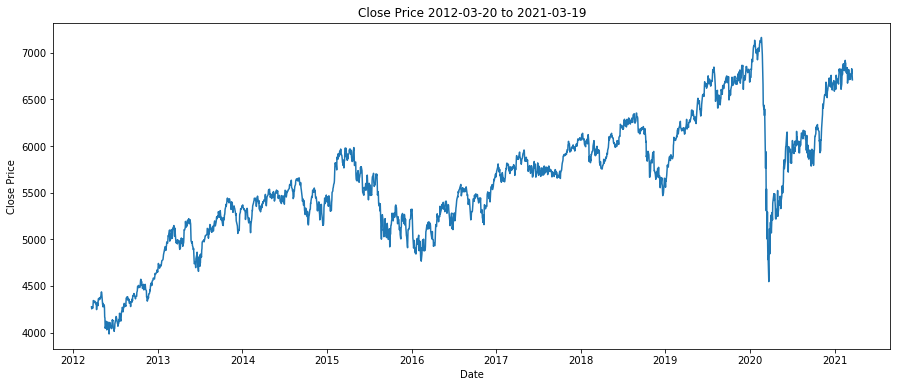

In [85]:
plt.figure(figsize = (15,6))
plt.plot(data2)
plt.title('Close Price 2012-03-20 to 2021-03-19')  # Add title to the plot
plt.xlabel('Date')                    # Add label to the x-axis
plt.ylabel('Close Price')       # Add label to the y-axis
plt.show()

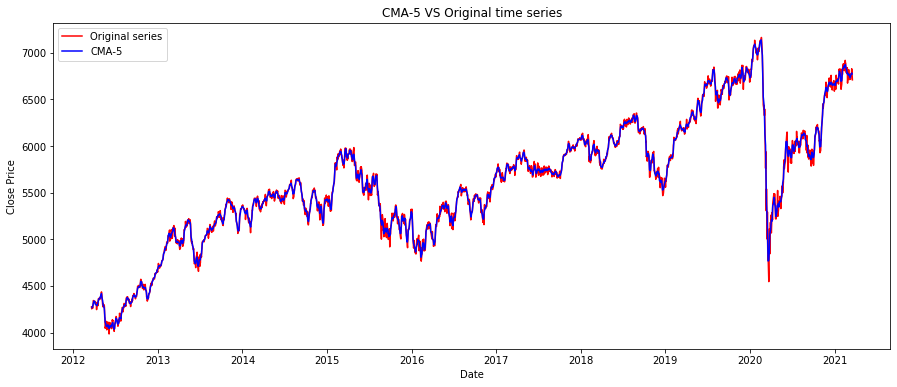

In [86]:
#CMA-5
Trend1 = data2.rolling(5,center=True).mean()
plt.figure(figsize = (15,6))
plt.plot(data2, color='red',label='Original series')
plt.plot(Trend1, color='blue',label='CMA-5')
plt.title('CMA-5 VS Original time series')
plt.xlabel('Date')                  
plt.ylabel('Close Price') 
plt.legend()
plt.show()

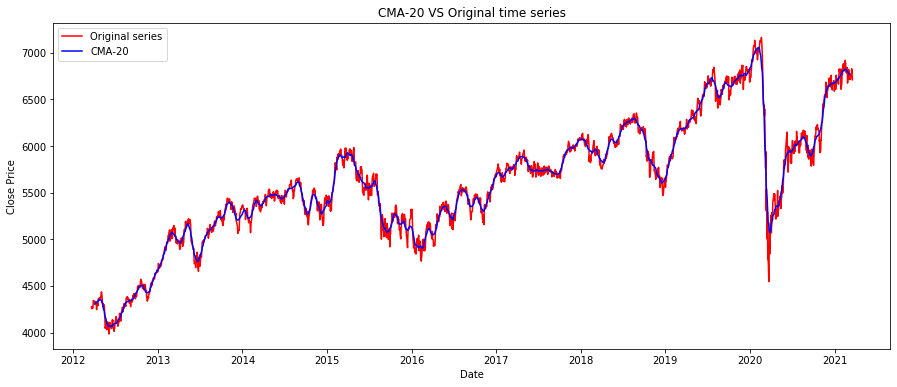

In [87]:
#CMA-20
Trend2 = data2.rolling(20,center=True).mean().rolling(2,center=True).mean().shift(-1)
plt.figure(figsize = (15,6))
plt.plot(data2, color='red',label='Original series')
plt.plot(Trend2, color='blue',label='CMA-20')
plt.title('CMA-20 VS Original time series')
plt.xlabel('Date')                  
plt.ylabel('Close Price') 
plt.legend()
plt.show()

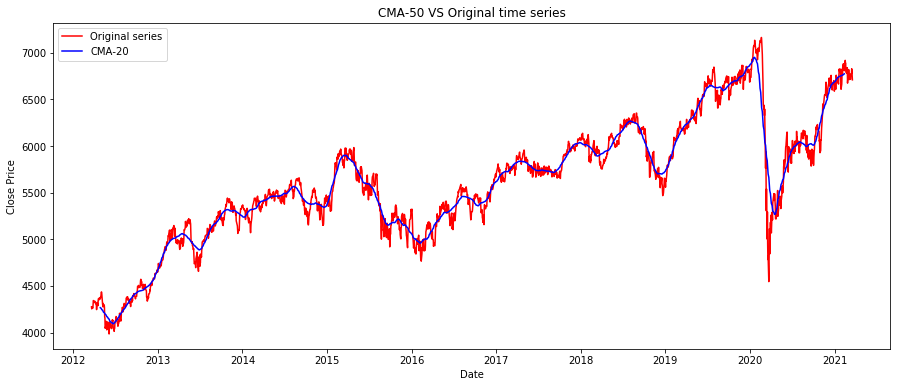

In [88]:
#CMA-50
Trend3 = data2.rolling(50,center=True).mean().rolling(2,center=True).mean().shift(-1)
plt.figure(figsize = (15,6))
plt.plot(data2, color='red',label='Original series')
plt.plot(Trend3, color='blue',label='CMA-20')
plt.title('CMA-50 VS Original time series')
plt.xlabel('Date')                  
plt.ylabel('Close Price') 
plt.legend()
plt.show()

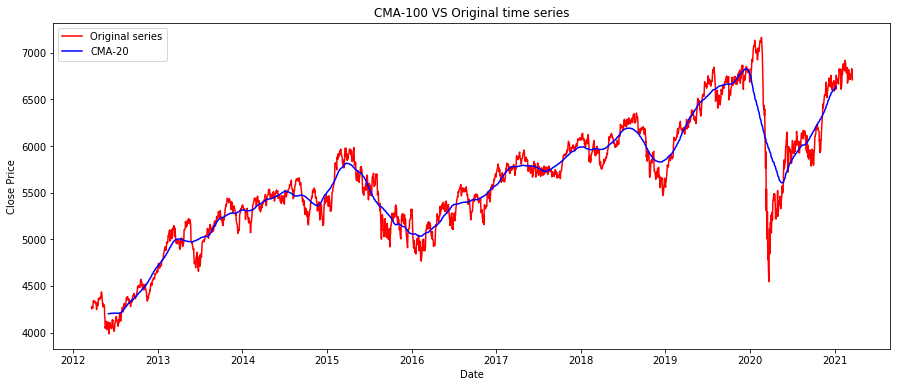

In [89]:
#CMA-100
Trend4 = data2.rolling(100,center=True).mean().rolling(2,center=True).mean().shift(-1)
plt.figure(figsize = (15,6))
plt.plot(data2, color='red',label='Original series')
plt.plot(Trend4, color='blue',label='CMA-20')
plt.title('CMA-100 VS Original time series')
plt.xlabel('Date')                  
plt.ylabel('Close Price') 
plt.legend()
plt.show()

In [90]:
#data3 = data2.tail(101)

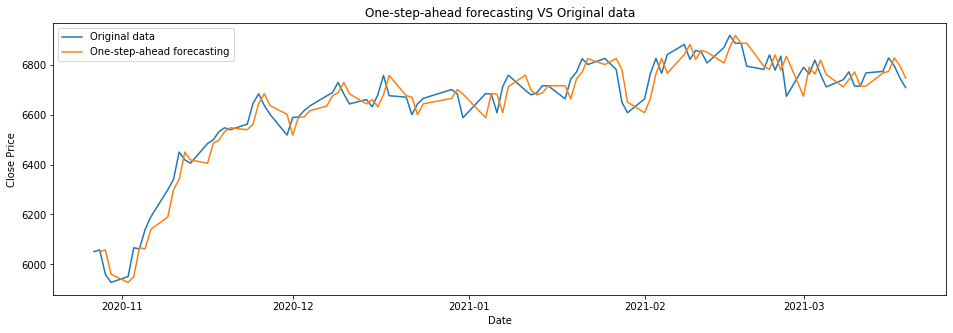

In [91]:
data3 = data2.tail(100)
data4 = data3.shift(1)
plt.figure(figsize=(16,5))
plt.plot(data3, label="Original data")
plt.plot(data4, label = "One-step-ahead forecasting")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title("One-step-ahead forecasting VS Original data")
plt.legend()
plt.show()

In [92]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [93]:
predictions = data4["Close Price"]
targets = data3["Close Price"]
print("RMSE is {:.3f}".format(rmse(predictions, targets)))

RMSE is 57.463


In [94]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual*100))
    return mape

In [95]:
print("MAPE is {:.3f}".format(MAPE(targets,predictions)))

MAPE is 0.718


In [96]:
data2['Stock Return'] = np.log(data2) - np.log(data2.shift(1))
data2

/Users/chengqian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Close Price,Stock Return
Date,,
2012-03-20,4275.0,NaN
2012-03-21,4254.3,-0.004854
2012-03-22,4273.7,0.004550
2012-03-23,4270.4,-0.000772
2012-03-26,4262.8,-0.001781
...,...,...
2021-03-15,6773.0,0.000916
2021-03-16,6827.1,0.007956
2021-03-17,6795.2,-0.004684


Text(0, 0.5, 'Index')

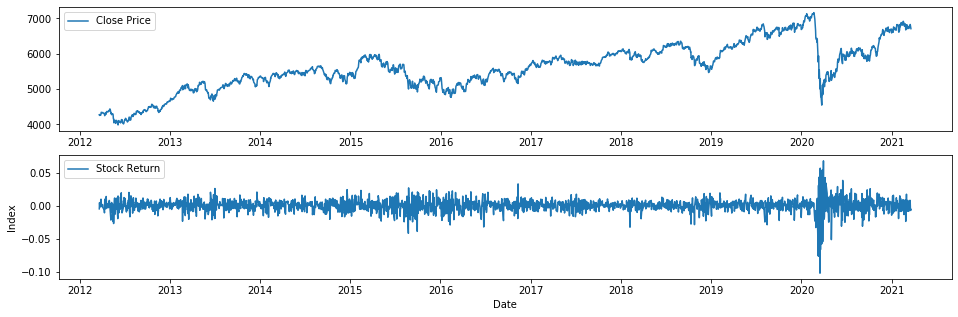

In [97]:
fig,ax = plt.subplots(2,1,figsize=(16,5))
ax[0].plot(data2["Close Price"])
ax[1].plot(data2["Stock Return"])
ax[0].legend(['Close Price'],loc=2)
ax[1].legend(['Stock Return'],loc=2)
plt.xlabel('Date')
plt.ylabel('Index')

In [98]:
data2.describe()

,Close Price,Stock Return
count,2327.000000,2326.000000
mean,5602.240868,0.000194
std,649.778415,0.009633
min,3985.000000,-0.102030
25%,5214.800000,-0.004294
50%,5577.000000,0.000620
75%,6002.800000,0.005206
max,7162.500000,0.067665


In [99]:
data2["Stock Return"].var()

9.27991828440884e-05

In [100]:
data2.var()

Close Price     422211.988201
Stock Return         0.000093
dtype: float64

In [101]:
data2.skew()

Close Price    -0.073049
Stock Return   -1.120975
dtype: float64

In [102]:
data2.kurtosis()

Close Price     -0.149945
Stock Return    13.614564
dtype: float64

In [103]:
y = data2["Stock Return"]
def sse(x, y):
    return np.sum(np.power(x-y,2))
sse_one = []
alphas = np.arange(0.001,1,0.001)

for i in alphas:
    smoothed = y.ewm(alpha = i, adjust=False).mean()
    sse_one.append(sse(smoothed[:-1], y.values[1:]))

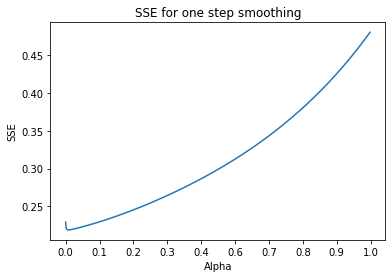

In [104]:
plt.figure()
plt.plot(sse_one)
plt.title("SSE for one step smoothing")
plt.ylabel("SSE")
plt.xlabel("Alpha")
plt.xticks(np.linspace(0, 1000, 10), ["{0:1.1f}".format(x) for x in np.linspace(0,1,10)])
plt.show()

In [105]:
optimal_alpha_one = alphas[np.argmin(sse_one)]
print("Optimal Alpha for 1-step forecast {:.3f}".format(optimal_alpha_one))

Optimal Alpha for 1-step forecast 0.011


In [106]:
y_train= data2["Stock Return"].head(2227)
alpha = 0.011
y_test = data2["Stock Return"].tail(100)
lt = [y_train[-1]]
for t in range(1,len(y_test)):
    l_t = alpha*y_test[t]+(1-alpha)*lt[t-1]
    lt.append(l_t)


In [107]:
print("MAPE is {:.3f}".format(MAPE(y_test,lt)))

MAPE is 125.695


/Users/chengqian/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/chengqian/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0, 0.5, 'Index')

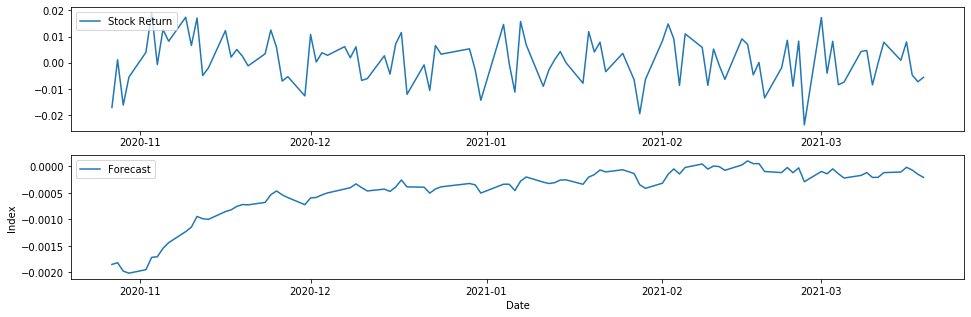

In [108]:
fig,ax = plt.subplots(2,1,figsize=(16,5))
ax[0].plot(y_test)
ax[1].plot(y_test.index,lt)
ax[0].legend(['Stock Return'],loc=2)
ax[1].legend(['Forecast'],loc=2)
plt.xlabel('Date')
plt.ylabel('Index')

In [109]:
data2['Squared Return'] = data2['Stock Return'] * data2['Stock Return']

/Users/chengqian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
data2

,Close Price,Stock Return,Squared Return
Date,,,
2012-03-20,4275.0,NaN,NaN
2012-03-21,4254.3,-0.004854,2.356002e-05
2012-03-22,4273.7,0.004550,2.070001e-05
2012-03-23,4270.4,-0.000772,5.966989e-07
2012-03-26,4262.8,-0.001781,3.172952e-06
...,...,...,...
2021-03-15,6773.0,0.000916,8.387237e-07
2021-03-16,6827.1,0.007956,6.329580e-05
2021-03-17,6795.2,-0.004684,2.193522e-05


In [111]:
y = data2['Squared Return']
sse_one = []
alphas = np.arange(0.001,1,0.001)

for i in alphas:
    smoothed = y.ewm(alpha = i, adjust=False).mean()
    sse_one.append(sse(smoothed[:-1], y.values[1:]))

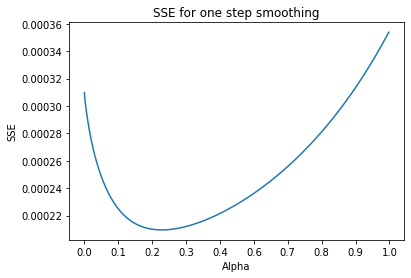

In [112]:
plt.figure()
plt.plot(sse_one)
plt.title("SSE for one step smoothing")
plt.ylabel("SSE")
plt.xlabel("Alpha")
plt.xticks(np.linspace(0, 1000, 10), ["{0:1.1f}".format(x) for x in np.linspace(0,1,10)])
plt.show()

In [113]:
optimal_alpha_one = alphas[np.argmin(sse_one)]
print("Optimal Alpha for 1-step forecast {:.3f}".format(optimal_alpha_one))

Optimal Alpha for 1-step forecast 0.255


In [114]:
y_train= data2['Squared Return'].head(2227)
alpha = 0.255
y_test = data2['Squared Return'].tail(100)
lt = [y_train[-1]]
for t in range(1,len(y_test)):
    l_t = alpha*y_test[t]+(1-alpha)*lt[t-1]
    lt.append(l_t)

In [115]:
print("MAPE is {:.3f}".format(MAPE(y_test,lt)))

MAPE is 228469.513


/Users/chengqian/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/chengqian/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0, 0.5, 'Index')

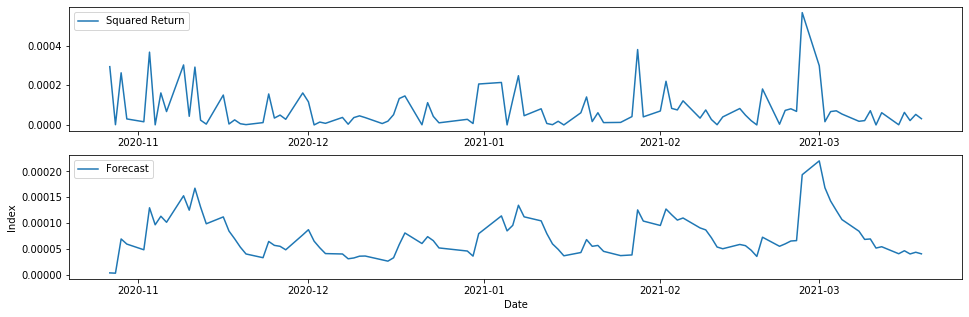

In [116]:
fig,ax = plt.subplots(2,1,figsize=(16,5))
ax[0].plot(y_test)
ax[1].plot(y_test.index,lt)
ax[0].legend(['Squared Return'],loc=2)
ax[1].legend(['Forecast'],loc=2)
plt.xlabel('Date')
plt.ylabel('Index')